In [1]:
import numpy as np
import pandas as pd
import json

df = pd.read_csv("data/merged_fill.csv") 
with open("data/meta.json", "r") as f:
    meta = json.load(f)

env_in_df = df[meta["environment"]["inside"].keys()]
env_out_df = df[meta["environment"]["outside"].keys()]
control_df = df[meta["control"].keys()]
growth_df = df[meta["growth"].keys()]

df.columns

Index(['FRT_LNGTH', 'FWRCT_HGHT', 'BLMNG_CLUSTER', 'FRST_TREE_CNT', 'FRT_WT',
       'FRT_WDTH', 'GRTH_LNGTH', 'YIELD_CNT', 'YIELD_CLUSTER', 'LAST_FWRCT_NO',
       'LEAF_LNGTH', 'LEAF_CNT', 'LEAF_WDTH', 'PLT_LNGTH', 'STEM_THNS',
       'HTNG_TPRT_2', 'MSRM_DT', 'PFBS_NTRO_CBDX_CTRN', 'EXTN_TPRT',
       'DWP_TPRT', 'WNDRC', 'ABSLT_HMDT', 'WDSP', 'STRTN_WATER', 'EXTN_SRQT',
       'WATER_LACK_VL', 'EXTN_ACCMLT_QOFLG', 'SPL_TPRT_1', 'SPL_TPRT_2',
       'HTNG_TPRT_1', 'VNTILAT_TPRT_5', 'VNTILAT_TPRT_4', 'VNTILAT_TPRT_3',
       'VNTILAT_TPRT_2', 'VNTILAT_TPRT_1', 'TRWVLV_OPDR_RATE_2',
       'TRWVLV_OPDR_RATE_1', 'HRZNT_SCRN_OPDR_RATE_2', 'SKLT_OPDR_RATE_1_LEFT',
       'HRZNT_SCRN_OPDR_RATE_1', 'SKLT_OPDR_RATE_1_RIGHT', 'INNER_TPRT_1',
       'INNER_TPRT_2', 'AVE_INNER_TPRT_1_2', 'AVE_INNER_HMDT_1_2',
       'INNER_HMDT_1', 'INNER_HMDT_2', 'CBDX_STNG_VL', 'WTSPL_QTY',
       'NTSLT_SPL_PH_LVL', 'NTSLT_SPL_PH_LVL_STNG_VL', 'NTSLT_SPL_ELCDT',
       'NTSLT_SPL_ELCDT_STNG_VL', 'RTTN_PUMP_

In [2]:
df["INNER_HMDT_1"] = (df["INNER_HMDT_1"] + df["INNER_HMDT_2"]) / 2
df["INNER_TPRT_1"] = (df["INNER_TPRT_1"] + df["INNER_TPRT_2"]) / 2
df["SUB_MHRLS_OPRT_YN"] = df[["SUB_MHRLS_OPRT_YN_1","SUB_MHRLS_OPRT_YN_2", "SUB_MHRLS_OPRT_YN_3"]].apply(
    lambda x: 0 if 0 in x.values else 1, axis=1)
df["SUB_MHRLS_OPRT_YN"].value_counts()

SUB_MHRLS_OPRT_YN
0    48015
1    21846
Name: count, dtype: int64

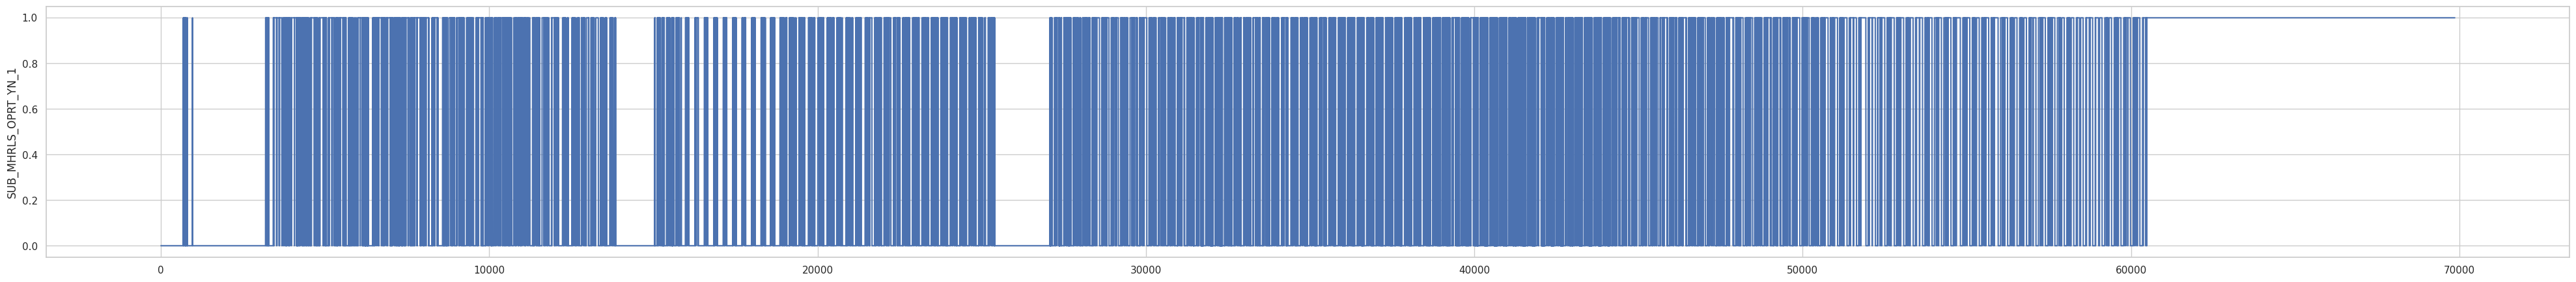

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.figure(figsize=(50, 5))

ax = sns.lineplot(x= range(df.shape[0]), y="SUB_MHRLS_OPRT_YN_1", data=df)
plt.show()

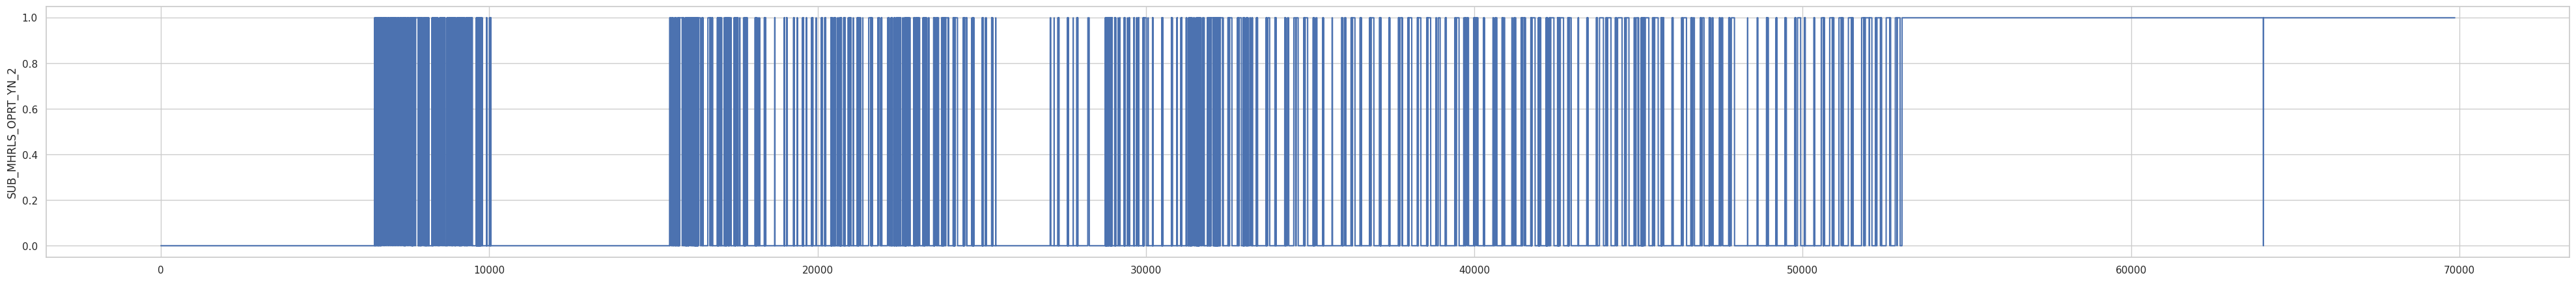

In [28]:
plt.figure(figsize=(50, 5))
ax = sns.lineplot(x= range(df.shape[0]), y="SUB_MHRLS_OPRT_YN_2", data=df)

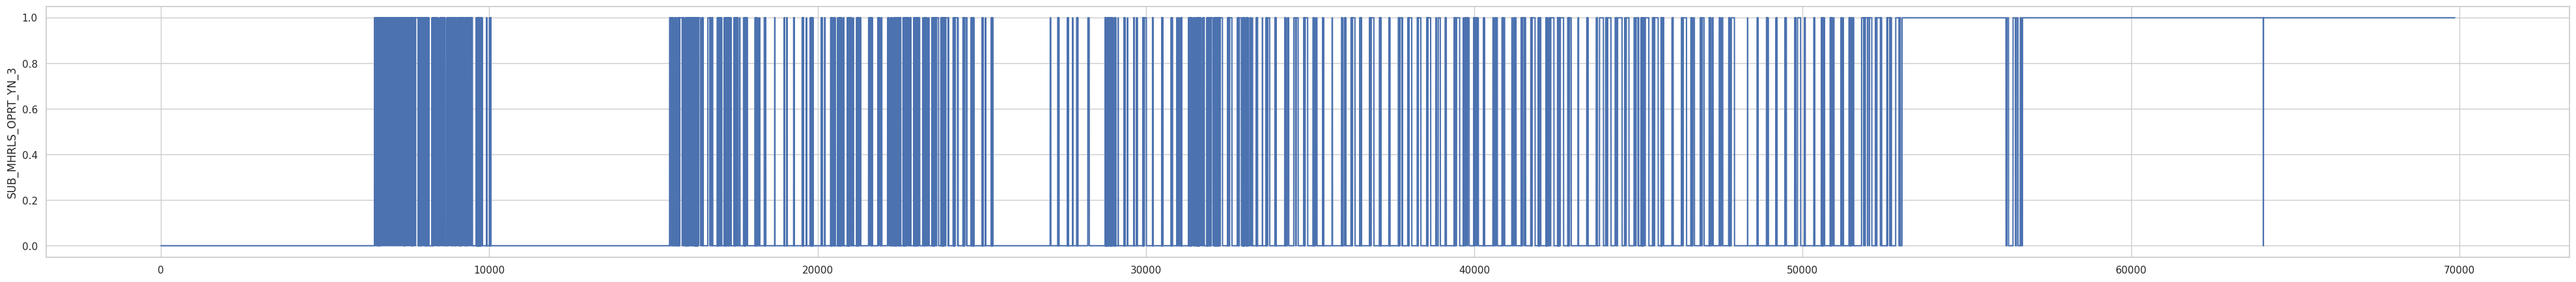

In [29]:
plt.figure(figsize=(50, 5))
ax = sns.lineplot(x= range(df.shape[0]), y="SUB_MHRLS_OPRT_YN_3", data=df)

In [16]:
df["RTTN_PUMP_OPRT_YN"] = df[["RTTN_PUMP_OPRT_YN_1","RTTN_PUMP_OPRT_YN_2"]].apply(
    lambda x: 0 if 1 in x.values else 1, axis=1)
df["RTTN_PUMP_OPRT_YN"].value_counts()

RTTN_PUMP_OPRT_YN
1    47687
0    22174
Name: count, dtype: int64

In [6]:
# 생육정보는 약 7일 간격으로 수집되며 개화군의 차이는 다음과 같다
x = "SUB_MHRLS_OPRT_YN"

before = 0
count = 0
for i in range(1, df.shape[0]):
    if df[x].iloc[i] != df[x].iloc[i-1]:
        count += 1
        print(df["MSRM_DT"].iloc[i], f"Difference: {df[x].iloc[i] - df[x].iloc[i-1]:.4f}")
print(count)
    

2022-10-30 00:10:00 Difference: 1.0000
2022-10-30 00:55:00 Difference: -1.0000
2022-10-30 01:00:00 Difference: 1.0000
2022-10-30 01:10:00 Difference: -1.0000
2022-10-30 01:15:00 Difference: 1.0000
2022-10-30 01:30:00 Difference: -1.0000
2022-10-30 01:35:00 Difference: 1.0000
2022-10-30 02:10:00 Difference: -1.0000
2022-10-30 02:15:00 Difference: 1.0000
2022-10-30 03:10:00 Difference: -1.0000
2022-10-30 03:15:00 Difference: 1.0000
2022-10-30 03:45:00 Difference: -1.0000
2022-10-30 03:50:00 Difference: 1.0000
2022-10-30 04:10:00 Difference: -1.0000
2022-10-30 04:15:00 Difference: 1.0000
2022-10-30 05:10:00 Difference: -1.0000
2022-10-30 05:15:00 Difference: 1.0000
2022-10-30 05:20:00 Difference: -1.0000
2022-10-30 05:25:00 Difference: 1.0000
2022-10-30 06:10:00 Difference: -1.0000
2022-10-30 06:20:00 Difference: 1.0000
2022-10-30 06:40:00 Difference: -1.0000
2022-10-30 06:55:00 Difference: 1.0000
2022-10-30 07:55:00 Difference: -1.0000
2022-10-30 08:00:00 Difference: 1.0000
2022-10-30 08

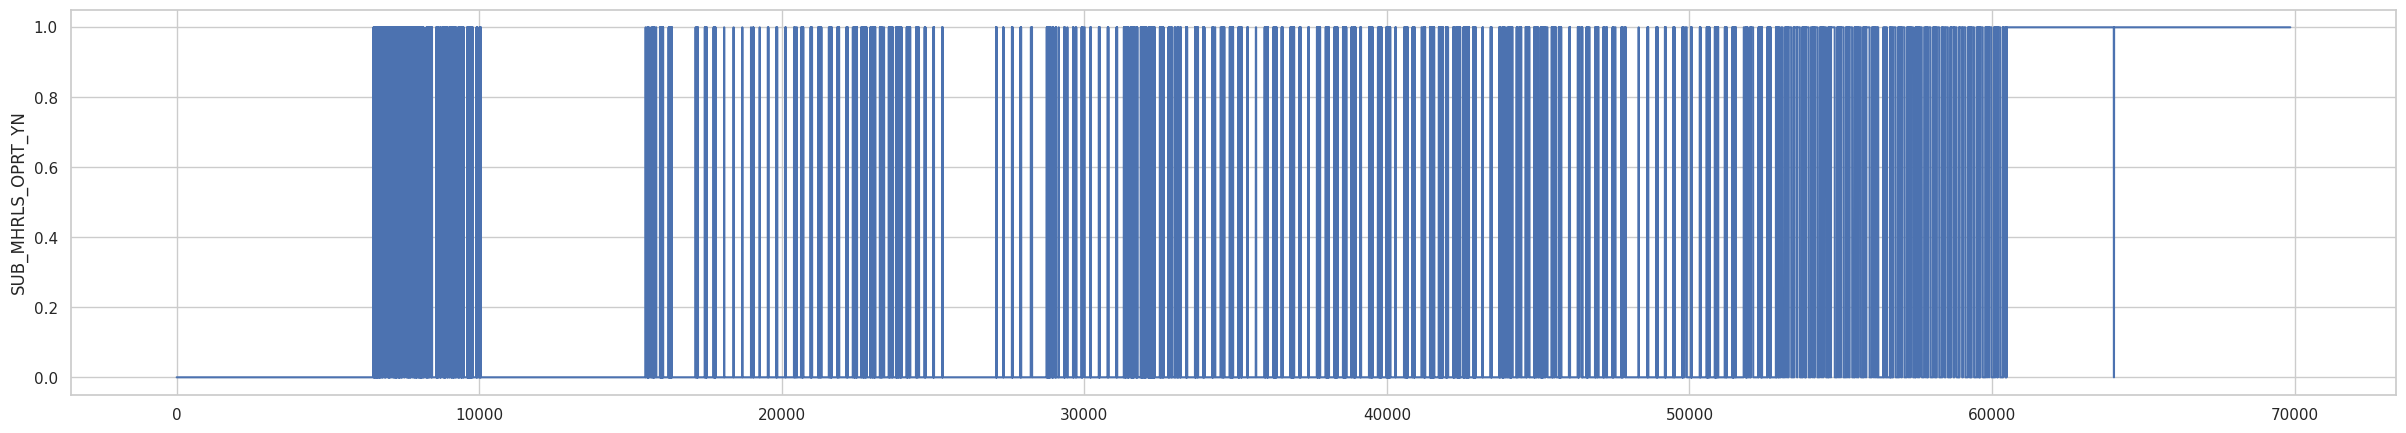

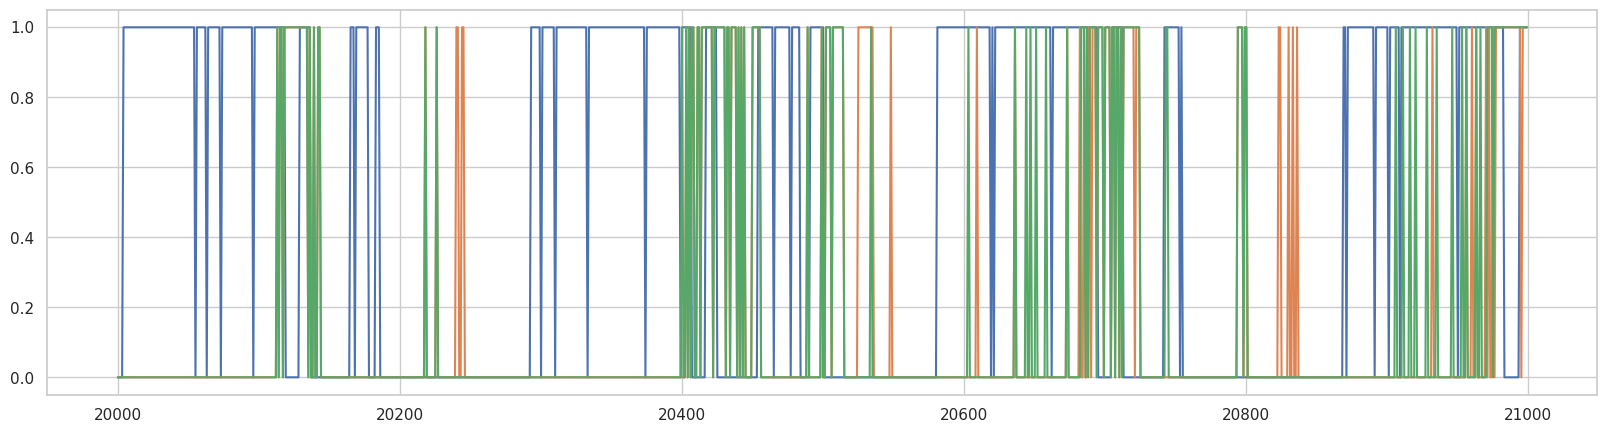

In [14]:
plt.figure(figsize=(20, 5))
plt.plot(range(df.shape[0])[20000:21000], df["SUB_MHRLS_OPRT_YN_1"][20000:21000])
plt.plot(range(df.shape[0])[20000:21000], df["SUB_MHRLS_OPRT_YN_2"][20000:21000])
plt.plot(range(df.shape[0])[20000:21000], df["SUB_MHRLS_OPRT_YN_3"][20000:21000])

In [29]:
import warnings
warnings.filterwarnings("ignore") 

x = "BLMNG_CLUSTER"
y = "SUB_MHRLS_OPRT_YN"

df["done"] = False

before = 0
count = 0
total_count=0
total_reward = 0
for i in range(1, df.shape[0]):
    if df[y].iloc[i] != df[y].iloc[i-1]:
        count += 1
    if df[x].iloc[i] != df[x].iloc[i-1]:
        reward = df[x].iloc[i] - df[x].iloc[i-1]
        print(df["MSRM_DT"].iloc[i], "count", count, f"Difference: {reward:.4f}")
        total_reward += reward
        total_count += 1
        count = 0

        if total_reward > 1:
            df["done"].iloc[i] = True
            total_reward = 0
            print("done")
    

2022-10-20 00:00:00 count 0 Difference: 2.4400
done
2022-10-27 00:00:00 count 0 Difference: 0.3400
2022-11-03 00:00:00 count 188 Difference: -0.0600
2022-11-10 00:00:00 count 284 Difference: 1.0400
done
2022-11-17 00:00:00 count 52 Difference: 0.4500
2022-11-24 00:00:00 count 0 Difference: 0.3100
2022-12-01 00:00:00 count 20 Difference: -0.6200
2022-12-08 00:00:00 count 100 Difference: -0.2200
2022-12-13 00:00:00 count 34 Difference: 1.5800
done
2022-12-28 00:00:00 count 228 Difference: 2.5600
done
2023-01-01 00:00:00 count 108 Difference: 0.9000
2023-01-02 00:00:00 count 18 Difference: 0.3100
done
2023-01-04 00:00:00 count 28 Difference: 0.4500
2023-01-09 00:00:00 count 0 Difference: 0.0400
2023-01-11 00:00:00 count 18 Difference: 0.4200
2023-01-16 00:00:00 count 111 Difference: 0.3100
done
2023-01-17 00:00:00 count 23 Difference: 0.4400
2023-01-23 00:00:00 count 98 Difference: 0.0600
2023-01-26 00:00:00 count 116 Difference: 0.5600
done
2023-01-30 00:00:00 count 172 Difference: 0.120